In [1]:
# 📚 Library Imports for Data Analysis, Modeling, and Optimization
# This cell contains all necessary imports for:
# - Data manipulation (pandas, numpy)
# - Visualization (matplotlib, seaborn)
# - Machine learning models and tools (scikit-learn, XGBoost, LightGBM, LazyPredict)
# - Model evaluation and selection (metrics, cross-validation, feature selection)
# - Hyperparameter tuning (Hyperopt)
# - Miscellaneous utilities (random, os, re, nbformat)

from lazypredict.Supervised import LazyClassifier

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, make_scorer

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV

from sklearn.feature_selection import RFE

from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import NearestCentroid

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier

from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from numpy import mean, std

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
import re
import nbformat
import os

import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

In [2]:
os.chdir(r'C:\Users\Ralph Dawang\Documents\Apziva Mentoring - ML\Project 1')

# Importing the dataset using pandas dataframe
df = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0)

# Labeling the columns of the loaded dataframe
df.columns = ['Happiness', 'delivered_on_time',
              'expected_order_came', 'User_ordered_what_they_want',
              'good_price_for_order', 'satisified_with_courier',
              'app_is_convenient']

In [3]:
# Finding a random seed that will be used all throughout 
# the testing that best suits the dataset
# seed = random.randint(1000, 9999)
seed = 5227
print(seed)

5227


In [4]:
# Feature Selection and Train-Test Split
# Selecting relevant features (X) and target variable (y)
X = df[['delivered_on_time', 'expected_order_came', 'User_ordered_what_they_want',
        'good_price_for_order', 'satisified_with_courier', 'app_is_convenient']]
y = df['Happiness']

# Splitting the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [5]:
# Custom Metric: Recall for Class 0
# Calculates recall specifically for class 0 to evaluate model performance on this class
def recall_class_0(y_test, y_pred):
    return recall_score(y_test, y_pred, pos_label=0, average='binary')

In [6]:
# 🚀 Training Multiple Classifiers with LazyPredict
# Models are evaluated using recall specific to class 0 (custom_metric)
# Returns performance metrics and predictions for each model

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=recall_class_0, random_state=seed)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 15.36it/s]

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,recall_class_0,Time Taken
Model,,,,,,
LGBMClassifier,0.65,0.68,0.68,0.65,0.82,0.17
ExtraTreeClassifier,0.65,0.65,0.65,0.66,0.64,0.03
DecisionTreeClassifier,0.65,0.65,0.65,0.66,0.64,0.03
XGBClassifier,0.65,0.65,0.65,0.66,0.64,0.13
SGDClassifier,0.62,0.64,0.64,0.61,0.82,0.03
BernoulliNB,0.62,0.63,0.63,0.62,0.73,0.03
QuadraticDiscriminantAnalysis,0.62,0.62,0.62,0.62,0.64,0.03
CalibratedClassifierCV,0.62,0.61,0.61,0.62,0.55,0.09
NuSVC,0.62,0.61,0.61,0.62,0.55,0.03


----------------------------------------

PassiveAggressiveClassifier

----------------------------------------

In [7]:
# Training a Passive-Aggressive Classifier
# Fitting the model on the training data with balanced class weights

pac_clf = PassiveAggressiveClassifier(random_state=seed, class_weight="balanced")
pac_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(class_weight='balanced', random_state=5227)

              precision    recall  f1-score   support

     class 0       0.33      0.09      0.14        11
     class 1       0.57      0.87      0.68        15

    accuracy                           0.54        26
   macro avg       0.45      0.48      0.41        26
weighted avg       0.47      0.54      0.46        26



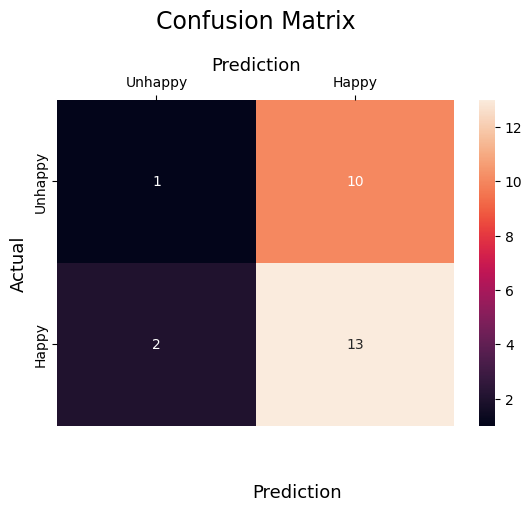

In [8]:
# Evaluating Passive-Aggressive Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

pac_y_pred = pac_clf.predict(X_test)
pac_cm = confusion_matrix(y_test, pac_y_pred)


target_names = ['class 0', 'class 1']
print(classification_report(y_test, pac_y_pred, target_names=target_names))


sns.heatmap(pac_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

---

LGBMClassifier

----

In [9]:
# Training a LightGBM Classifier
# Fitting the model with default parameters and a fixed random seed

lgbm_model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, random_state=seed)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(random_state=5227)

              precision    recall  f1-score   support

     class 0       0.56      0.82      0.67        11
     class 1       0.80      0.53      0.64        15

    accuracy                           0.65        26
   macro avg       0.68      0.68      0.65        26
weighted avg       0.70      0.65      0.65        26



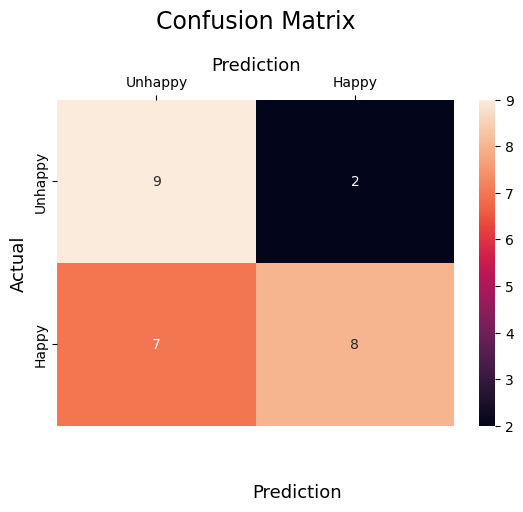

In [10]:
# Evaluating LightGBM Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_cm = confusion_matrix(y_test, lgbm_y_pred)


target_names = ['class 0', 'class 1']
print(classification_report(y_test, lgbm_y_pred, target_names=target_names))


sns.heatmap(lgbm_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

------------------------------------

XGBClassifier

-----------------------------------------------

In [11]:
# Training an XGBoost Classifier
# Model trained with use_label_encoder=False and eval_metric='mlogloss'

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

     class 0       0.58      0.64      0.61        11
     class 1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



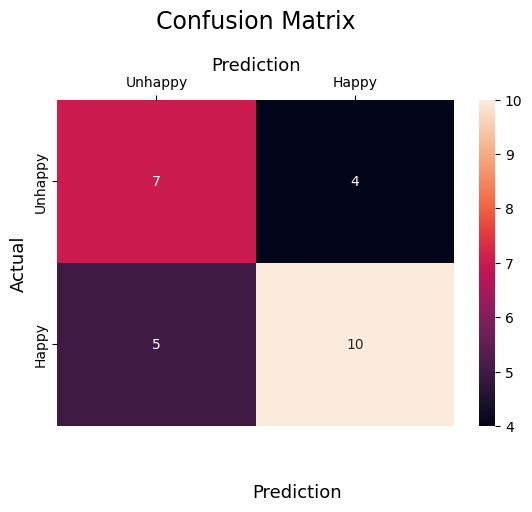

In [12]:
# Evaluating XGBoost Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

xgb_y_pred = xgb_model.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, xgb_y_pred, target_names=target_names))


sns.heatmap(xgb_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

-----------------------------------

Bernoulli Naive Bayes

-----------------------------------

In [13]:
# Training a Bernoulli Naive Bayes Classifier
# Model trained with binarize threshold set to 4

bnb_model = BernoulliNB(binarize=4)
bnb_model.fit(X_train, y_train)

BernoulliNB(binarize=4)

              precision    recall  f1-score   support

     class 0       0.50      0.64      0.56        11
     class 1       0.67      0.53      0.59        15

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.60      0.58      0.58        26



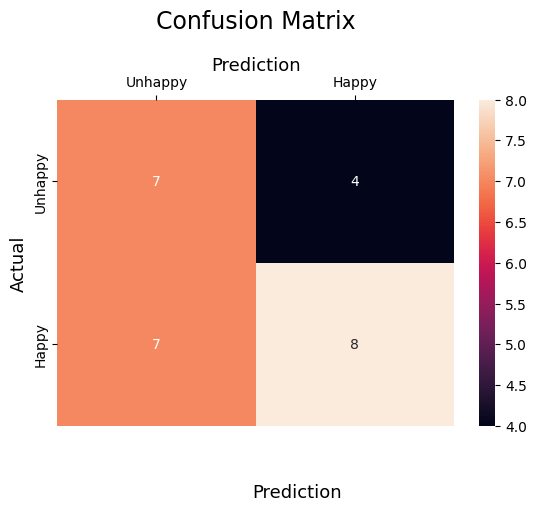

In [14]:
# Evaluating Bernoulli Naive Bayes Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

bnb_y_pred = bnb_model.predict(X_test)
bnb_cm = confusion_matrix(y_test, bnb_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, bnb_y_pred, target_names=target_names))

sns.heatmap(bnb_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

-------------------------------

NEAREST CENTROID

---------------------------------------------------

In [15]:
# Training a Nearest Centroid Classifier
# Fits the model based on the centroid of each class in the feature space

nc_model = NearestCentroid()
nc_model.fit(X_train, y_train)

NearestCentroid()

              precision    recall  f1-score   support

     class 0       0.53      0.73      0.62        11
     class 1       0.73      0.53      0.62        15

    accuracy                           0.62        26
   macro avg       0.63      0.63      0.62        26
weighted avg       0.65      0.62      0.62        26



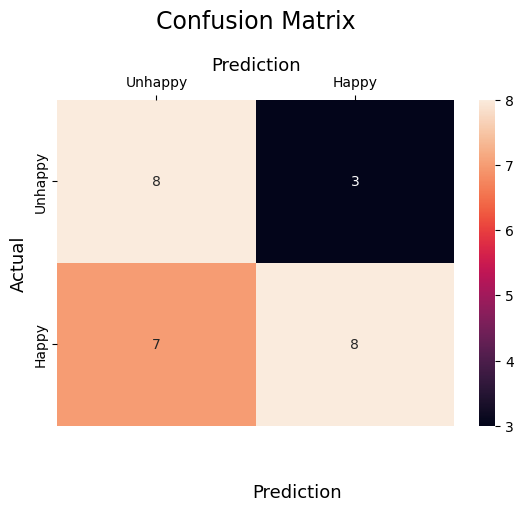

In [16]:
# Evaluating Nearest Centroid Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

nc_y_pred = nc_model.predict(X_test)
nc_cm = confusion_matrix(y_test, nc_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, nc_y_pred, target_names=target_names))

sns.heatmap(nc_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

--------------------------------

Support Vector Machine

-----------------------------------

In [17]:
# Training a Support Vector Classifier (SVC)
# Model trained with a fixed random seed for reproducibility

svm = SVC(random_state=seed)
svm.fit(X_train, y_train)

SVC(random_state=5227)

              precision    recall  f1-score   support

     class 0       0.58      0.64      0.61        11
     class 1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



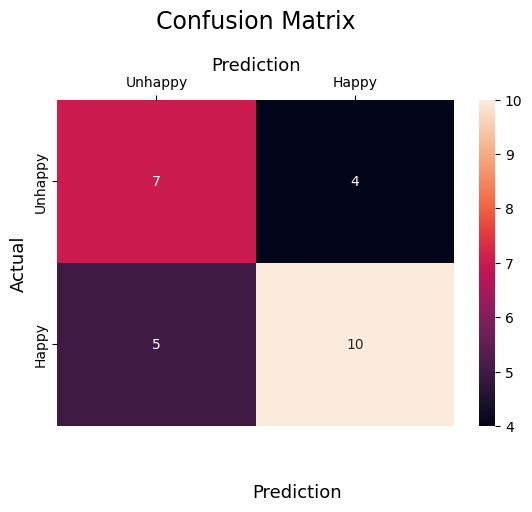

In [18]:
# Evaluating Support Vector Machine Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

svm_y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, svm_y_pred, target_names=target_names))

sns.heatmap(svm_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

---

SGDClassifier

----

In [19]:
# Training a Stochastic Gradient Descent Classifier (SGDClassifier)
# Fitting the classifier using `log_loss` (custom), with a custom regularization strength (`alpha=0.01`) 
# and a fixed random seed for reproducibility. All other parameters are set to their default values.


SGDC_clf = SGDClassifier(loss = 'log_loss', alpha = 0.01, max_iter = 1000, random_state=seed)
SGDC_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=5227)

              precision    recall  f1-score   support

     class 0       0.46      1.00      0.63        11
     class 1       1.00      0.13      0.24        15

    accuracy                           0.50        26
   macro avg       0.73      0.57      0.43        26
weighted avg       0.77      0.50      0.40        26



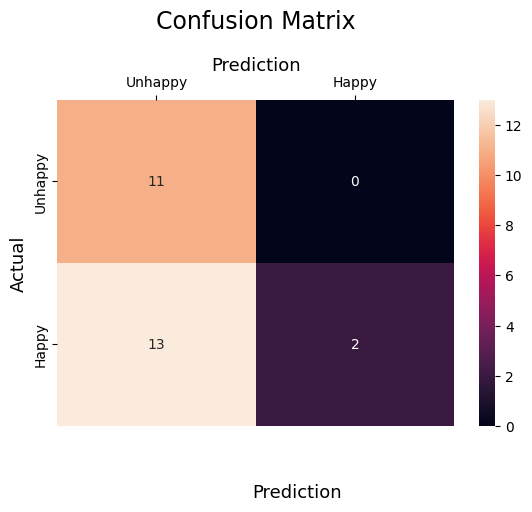

In [20]:
# Evaluating Stochastic Gradient Descent Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

SGDC_y_pred = SGDC_clf.predict(X_test)
SGDC_cm = confusion_matrix(y_test, SGDC_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, SGDC_y_pred, target_names=target_names))

sns.heatmap(SGDC_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

-----

DECISION TREE CLASSIFIER

---------------------------------------------------

In [21]:
# Training a Decision Tree Classifier (DecisionTreeClassifier)
# Fitting a decision tree with a custom random seed for reproducibility. All other parameters are set to their default values.


dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5227)

              precision    recall  f1-score   support

     class 0       0.58      0.64      0.61        11
     class 1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



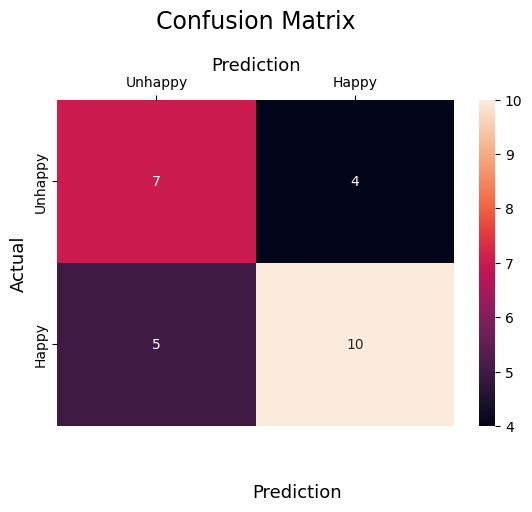

In [22]:
# Evaluating Decision Tree Classifier Performance
# - Generates predictions and computes confusion matrix
# - Displays a classification report for class-wise precision, recall, and F1-score
# - Visualizes confusion matrix using a heatmap

dtc_y_pred = dtc_clf.predict(X_test)

dtc_cm = confusion_matrix(y_test, dtc_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, dtc_y_pred, target_names=target_names))

sns.heatmap(dtc_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [23]:
### Hyperparameter Tuning for Decision Tree using GridSearchCV
# Performing grid search with 5-fold cross-validation to find the best combination of tree depth, split criteria, 
# and minimum samples for splits and leaves. Random seed is set for reproducibility. All other parameters use default values.

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=seed)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.65
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=5227)


---------------------------------------------------

Bagging using LGBM as base classifier

----

In [24]:
%%capture
### Training a Bagging Ensemble with LightGBM Base Estimator
# Using `BaggingClassifier` with a LightGBM base model (default settings) and 10 estimators. Random seed is set for reproducibility. 
# All other parameters use default values.
# %%capture was used to minimize the output result from the notebook

bag_base_clf = lgb.LGBMClassifier()
bagging_clf = BaggingClassifier(bag_base_clf, n_estimators=10, random_state=seed)
bagging_clf.fit(X_train, y_train)

In [25]:
# Evaluating Bagging Classifier Performance on Test Data
# Predicting test labels using the trained Bagging classifier and evaluating the performance using accuracy and a classification report 
# (precision, recall, f1-score) for each class.

bagging_y_pred = bagging_clf.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, bagging_y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, bagging_y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

     class 0       0.53      0.82      0.64        11
     class 1       0.78      0.47      0.58        15

    accuracy                           0.62        26
   macro avg       0.65      0.64      0.61        26
weighted avg       0.67      0.62      0.61        26

Accuracy: 0.6153846153846154


----

AdaBoost (Ensemble - Boosting) using LGBM

---

In [26]:
%%capture
# Training an AdaBoost Ensemble with LightGBM Base Estimator
# Using `AdaBoostClassifier` with a LightGBM base model (default settings), 50 estimators (custom), and a learning rate of 1.0 (default). 
# Random seed is set for reproducibility.
# %%capture was used to minimize the output result from the notebook

ada_base_clf = lgb.LGBMClassifier()
adaboost_classifier = AdaBoostClassifier(
    ada_base_clf, n_estimators=50, learning_rate=1.0, random_state=seed
)
adaboost_classifier.fit(X_train, y_train)

In [27]:
# Evaluating AdaBoost Classifier Performance on Test Data
# Generating predictions on the test set using the trained AdaBoost model and evaluating performance using accuracy 
# and a detailed classification report for each class.

adaboost_y_pred = adaboost_classifier.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, adaboost_y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, adaboost_y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

     class 0       0.56      0.82      0.67        11
     class 1       0.80      0.53      0.64        15

    accuracy                           0.65        26
   macro avg       0.68      0.68      0.65        26
weighted avg       0.70      0.65      0.65        26

Accuracy: 0.6538461538461539


----

Ensemble -- Stacking

---

>lr 0.566 (0.153)
>lgbm 0.646 (0.134)
>xgb 0.556 (0.144)
>nc 0.574 (0.145)
>svm 0.524 (0.154)
>bnb 0.628 (0.139)
>sgd 0.508 (0.121)
>dtc 0.578 (0.147)
>stacking 0.618 (0.132)


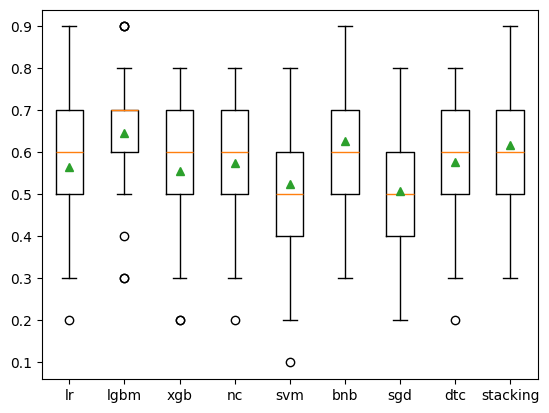

In [28]:
# Defining a Stacking Ensemble Model
# Creating a stacking classifier with LightGBM and Bernoulli Naive Bayes as base models (with custom settings), and logistic regression 
# as the meta-learner (custom class weight and random seed). Using 5-fold cross-validation for training the stack.

def get_stacking():
	# define the base models
    level0 = list()
    level0.append(('lgbm', lgb.LGBMClassifier(learning_rate=0.01,max_depth=-1,random_state=seed)))
    level0.append(('bnb', BernoulliNB(binarize=4.5)))
    
	# define meta learner model
    level1 = LogisticRegression(class_weight="balanced", random_state=seed)

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(class_weight="balanced", random_state=seed)
    models['lgbm'] = lgb.LGBMClassifier(learning_rate=0.01,max_depth=-1,random_state=seed)
    models['xgb'] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    models['nc'] = NearestCentroid()
    models['svm'] = SVC(probability=True, random_state=seed)
    models['bnb'] = BernoulliNB(binarize=4.5)
    models['sgd'] = SGDClassifier(loss = 'log_loss', alpha = 0.01, max_iter = 1000, random_state=seed)
    models['dtc'] = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3, random_state=seed)
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=5227)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

NOTE: AS PER TESTING SCENARIOS DONE, WE CANNOT STILL RELY ON STACKING AS LGBM AS BASE MODEL PROVIDES MUCH ACCURATE OUTPUT COMPARED TO STACKING

-----

ENSEMBLING USING VOTING CLASSIFIER

----

In [29]:
# Training a Hard Voting Ensemble Classifier
# Combining multiple classifiers — LightGBM, BernoulliNB, Logistic Regression, SVM, and Decision Tree — into a hard voting ensemble. 
# Custom parameters are used for some base models, and random seed is set for reproducibility.

estimator = []
estimator.append(('lgbm', lgb.LGBMClassifier(learning_rate=0.01,max_depth=-1,random_state=seed)))
estimator.append(('bnb', BernoulliNB(binarize=4.5)))
estimator.append(('lr', LogisticRegression(class_weight="balanced", random_state=seed)))
estimator.append(('svm', SVC(probability=True, random_state=seed)))
estimator.append(('dtc', DecisionTreeClassifier(random_state=seed)))

hard = VotingClassifier(estimators=estimator, voting='hard')
hard.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(learning_rate=0.01,
                                             random_state=5227)),
                             ('bnb', BernoulliNB(binarize=4.5)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=5227)),
                             ('svm', SVC(probability=True, random_state=5227)),
                             ('dtc',
                              DecisionTreeClassifier(random_state=5227))])

              precision    recall  f1-score   support

     class 0       0.53      0.73      0.62        11
     class 1       0.73      0.53      0.62        15

    accuracy                           0.62        26
   macro avg       0.63      0.63      0.62        26
weighted avg       0.65      0.62      0.62        26



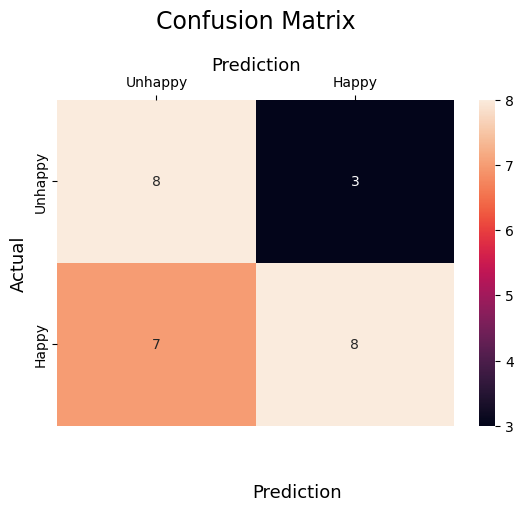

In [30]:
# Evaluating Hard Voting Classifier Performance and Visualizing Confusion Matrix
# Generating predictions on the test set using the hard voting classifier and evaluating performance with a classification report. 
# Additionally, visualizing the confusion matrix as a heatmap for better interpretation of model results.

hard_y_pred = hard.predict(X_test)
hard_cm = confusion_matrix(y_test, hard_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, hard_y_pred, target_names=target_names))

sns.heatmap(hard_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [31]:
# Training a Soft Voting Ensemble Classifier
# Combining multiple classifiers — LightGBM, BernoulliNB, Logistic Regression, SVM, and Decision Tree — into a soft voting ensemble, 
# where the prediction is based on the predicted probabilities. Custom parameters are used for some base models, and random seed is 
# set for reproducibility.

soft = VotingClassifier(estimators = estimator, voting = 'soft')
soft.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(learning_rate=0.01,
                                             random_state=5227)),
                             ('bnb', BernoulliNB(binarize=4.5)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=5227)),
                             ('svm', SVC(probability=True, random_state=5227)),
                             ('dtc',
                              DecisionTreeClassifier(random_state=5227))],
                 voting='soft')

              precision    recall  f1-score   support

     class 0       0.58      0.64      0.61        11
     class 1       0.71      0.67      0.69        15

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.66        26



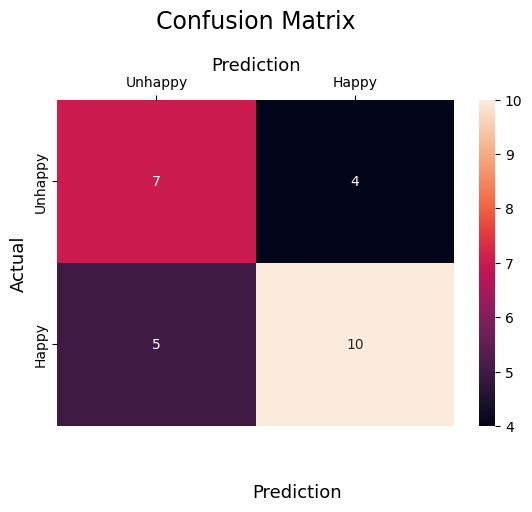

In [32]:
# Evaluating Soft Voting Classifier Performance and Visualizing Confusion Matrix
# Generating predictions on the test set using the soft voting classifier and evaluating performance with a classification report. 
# Additionally, visualizing the confusion matrix as a heatmap for better interpretation of model results.

soft_y_pred = soft.predict(X_test)
soft_cm = confusion_matrix(y_test, soft_y_pred)

target_names = ['class 0', 'class 1']
print(classification_report(y_test, soft_y_pred, target_names=target_names))

sns.heatmap(soft_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

NOTES:

estimators used: lgbm, bnb, LR, svm, dtc

A. From HARD VOTING, we got recall for class 0 = 73% with accuracy of 62%
- This still does not go beyond base LGBMClassifier model where recall for class 0 = 82% with accuracy of 65%

B. From SOFT VOTING, we got recall for class 0 = 64% with accuracy of 65%
- Comparing from hard voting, with the increase of accuracy, recall class decrease.
- Still LGBMClassifier base model is above.

---

Recursive Feature Elimination

----

In [33]:
%%capture
# Performing Recursive Feature Elimination (RFE) with LightGBM
# Using Recursive Feature Elimination (RFE) with a different classifiers as the estimator to select the top 3 features. 
# Custom parameters are used for the LightGBM model, and random seed is set for reproducibility.
# %%capture was used to minimize the output result from the notebook

rfe_estimator_lgbm = lgb.LGBMClassifier(learning_rate=0.01,max_depth=-1,random_state=seed)
rfe_selector_lgbm = RFE(estimator=rfe_estimator_lgbm, n_features_to_select=3)
rfe_selector_lgbm = rfe_selector_lgbm.fit(X, y)

rfe_estimator_lr = LogisticRegression(class_weight="balanced", random_state=seed)
rfe_selector_lr = RFE(estimator=rfe_estimator_lr, n_features_to_select=3)
rfe_selector_lr = rfe_selector_lr.fit(X, y)

rfe_estimator_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rfe_selector_xgb = RFE(estimator=rfe_estimator_xgb, n_features_to_select=3)
rfe_selector_xgb = rfe_selector_xgb.fit(X, y)

rfe_estimator_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3, random_state=seed)
rfe_selector_dtc = RFE(estimator=rfe_estimator_dtc, n_features_to_select=3)
rfe_selector_dtc = rfe_selector_dtc.fit(X, y)

In [34]:
# Analyzing Selected Features from RFE for Different Models
# Displaying the selected features from Recursive Feature Elimination (RFE) for LightGBM, Logistic Regression, XGBoost, 
# and Decision Tree classifiers. These features are considered the most important for each model based on RFE.

selected_features_lgbm = X.columns[rfe_selector_lgbm.support_]
print("Selected Features:", selected_features_lgbm)

selected_features_lr = X.columns[rfe_selector_lr.support_]
print("Selected Features:", selected_features_lr)

selected_features_xgb = X.columns[rfe_selector_xgb.support_]
print("Selected Features:", selected_features_xgb)

selected_features_dtc = X.columns[rfe_selector_dtc.support_]
print("Selected Features:", selected_features_dtc)

Selected Features: Index(['delivered_on_time', 'User_ordered_what_they_want',
       'good_price_for_order'],
      dtype='object')
Selected Features: Index(['delivered_on_time', 'User_ordered_what_they_want',
       'satisified_with_courier'],
      dtype='object')
Selected Features: Index(['delivered_on_time', 'User_ordered_what_they_want',
       'app_is_convenient'],
      dtype='object')
Selected Features: Index(['delivered_on_time', 'expected_order_came', 'satisified_with_courier'], dtype='object')


----

Hyperopt Tuning without reduced features

----

In [35]:
# Splitting the Dataset into Training and Testing Sets
# Dividing the dataset into training (80%) and testing (20%) sets, while maintaining the class distribution (`stratify=y`). 
# Random seed is set for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [36]:
# Defining Hyperparameter Search Space for LightGBM Model
# Setting up a hyperparameter search space for tuning the LightGBM model using `hp.quniform`, `hp.choice`, and `hp.loguniform` 
# for key parameters such as `num_leaves`, `max_depth`, `learning_rate`, and `n_estimators` to optimize model performance.

search_space = {
    'num_leaves': hp.quniform('num_leaves', 5, 200, 1),
    'max_depth': hp.choice('max_depth', [-1, 3, 5 , 10, 12, 15, 18, 20]),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # log-uniform for better exploration
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10)
}

In [37]:
# Defining Objective Function for Hyperparameter Optimization
# Creating an objective function to optimize LightGBM hyperparameters (`num_leaves`, `max_depth`, `n_estimators`) 
# using cross-validation with accuracy as the scoring metric. The function returns the negative of the accuracy 
# score as the loss for optimization.

def objective(params):
    params['num_leaves'] = int(params['num_leaves'])  # Convert float to int
    params['max_depth'] = int(params['max_depth']) if params['max_depth'] != -1 else -1
    params['n_estimators'] = int(params['n_estimators'])

    model = lgb.LGBMClassifier(**params, random_state=seed)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

In [38]:
%%capture
# Running Hyperparameter Optimization with Hyperopt
# Using the Tree-structured Parzen Estimator (TPE) algorithm to perform hyperparameter optimization on the LightGBM model. 
# The optimization runs 50 trials, with the objective function evaluating model performance using 5-fold cross-validation and 
# accuracy as the scoring metric.
# %%capture was used to minimize the output result from the notebook

trials = Trials()

best_params = fmin(
    fn=objective,        # Objective function
    space=search_space,  # Hyperparameter space
    algo=tpe.suggest,    # Tree-structured Parzen Estimator (TPE)
    max_evals=50,        # Number of iterations/trials
    trials=trials,       # Store search history
    show_progressbar=False,
    rstate=np.random.default_rng(seed)
)

In [39]:
# Converting Hyperparameters to Final Format
# Converting the optimized hyperparameters from the Hyperopt search space to the correct format for LightGBM. 
# This includes converting numerical values to integers and ensuring `max_depth` corresponds to a valid value from the predefined set.

def converted(tuning):
    #boosting = ['gbdt', 'dart', 'rf']
    #freq = [0, 1, 3, 5, 7, 8, 9, 10]
    depth = [-1, 3, 5 , 10, 12, 15, 18, 20]

    converted_params = tuning.copy()  # Make a copy to avoid modifying the original dictionary

    # Convert numerical parameters to integers
    converted_params['num_leaves'] = int(float(tuning['num_leaves']))
    converted_params['n_estimators'] = int(float(tuning['n_estimators']))
    
    # Ensure max_depth uses a valid index
    max_depth_index = tuning['max_depth']
    if 0 <= max_depth_index < len(depth):
        converted_params['max_depth'] = depth[max_depth_index]
    else:
        converted_params['max_depth'] = depth[0]  # Default to first value if index is out of range

    return converted_params  # Return the processed dictionary


converted_best_params = converted(best_params)

print("\nConverted Best Hyperparameters:")
for key, value in converted_best_params.items():
    print(f"{key} = {value}")


Converted Best Hyperparameters:
learning_rate = 0.5927856373294783
max_depth = -1
n_estimators = 170
num_leaves = 56


In [40]:
# Training LightGBM Model with Optimized Hyperparameters
# Training the LightGBM classifier using the hyperparameters obtained from the Hyperopt optimization process. 
# The model is fitted to the training data with the optimized parameters to improve performance.

lgbm_hyperopt = lgb.LGBMClassifier(**converted_best_params, random_state = seed) # **best_params will indicate all the hypertuning value from the trials.
lgbm_hyperopt.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=np.float64(0.5927856373294783), n_estimators=170,
               num_leaves=56, random_state=5227)

              precision    recall  f1-score   support

     class 0       0.64      0.58      0.61        12
     class 1       0.67      0.71      0.69        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



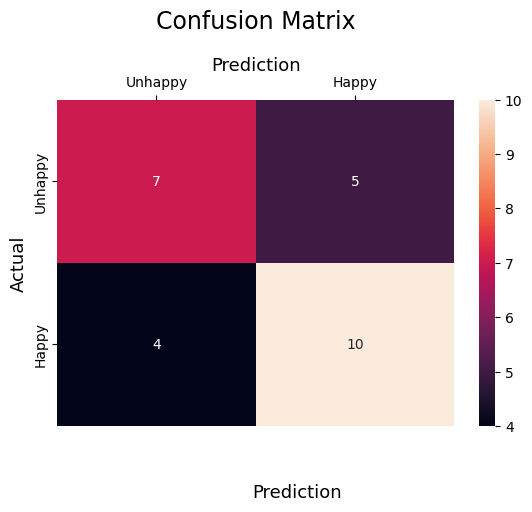

In [41]:
# Evaluating LightGBM Performance and Visualizing Confusion Matrix using the best hyperparameters from hyperopt
# Generating predictions on the test set using the LightGBM classifier and evaluating performance with a classification report. 
# Additionally, visualizing the confusion matrix as a heatmap for better interpretation of model results.

lgbm_hyperopt_y_pred = lgbm_hyperopt.predict(X_test)
lgbm_hyperopt_cm = confusion_matrix(y_test, lgbm_hyperopt_y_pred)


target_names = ['class 0', 'class 1']
print(classification_report(y_test, lgbm_hyperopt_y_pred, target_names=target_names))


sns.heatmap(lgbm_hyperopt_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

----

HyperOPT with reduced features (LightGBM)

------

In [42]:
# Using Selected Features from RFE for Model Training
# Reducing the feature set based on Recursive Feature Elimination (RFE) results, selecting the most important features (`selected_features_lgbm`). 
# The dataset is then split into training and testing sets, maintaining class distribution (`stratify=y`), and ensuring reproducibility with a 
# fixed random seed.

X_reduced = X[selected_features_lgbm]
y = df['Happiness']

Xr_train, Xr_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, stratify=y, random_state=seed)

In [43]:
# Redefining HyperOPT search space for LightGBM model referencing to the reducted features from RFE.

search_space = {
    'num_leaves': hp.quniform('num_leaves', 5, 200, 1),
    'max_depth': hp.choice('max_depth', [-1, 3, 5 , 10, 12, 15, 18, 20]),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # log-uniform for better exploration
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10)
}

In [44]:
# Redefining Objective function for HyperParameter Optimization using LightGBM model referencing to the reducted features from RFE.

def objective(params):
    params['num_leaves'] = int(params['num_leaves'])  # Convert float to int
    params['max_depth'] = int(params['max_depth']) if params['max_depth'] != -1 else -1
    params['n_estimators'] = int(params['n_estimators'])

    model = lgb.LGBMClassifier(**params, random_state=seed)
    score = cross_val_score(model, Xr_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

In [45]:
%%capture
# Re-running Hyperparameter Optimization with Hyperopt referencing to the reducted features from RFE
# Using the Tree-structured Parzen Estimator (TPE) algorithm to perform hyperparameter optimization on the LightGBM model. 
# The optimization runs 50 trials, with the objective function evaluating model performance using 5-fold cross-validation and 
# accuracy as the scoring metric.
# %%capture was used to minimize the output result from the notebook

trials = Trials()

best_params = fmin(
    fn=objective,        # Objective function
    space=search_space,  # Hyperparameter space
    algo=tpe.suggest,    # Tree-structured Parzen Estimator (TPE)
    max_evals=50,        # Number of iterations/trials
    trials=trials,       # Store search history
    show_progressbar=False,
    rstate=np.random.default_rng(seed)
)

In [46]:
# Re-running Hyperparameters Conversion to Final Format
# Converting the optimized hyperparameters from the Hyperopt search space to the correct format for LightGBM. 
# This includes converting numerical values to integers and ensuring `max_depth` corresponds to a valid value from the predefined set.
# Features used are the reducted features from RFE.

def converted(tuning):
    depth = [-1, 3, 5 , 10, 12, 15, 18, 20]
    converted_params = tuning.copy()  # Make a copy to avoid modifying the original dictionary
    converted_params['num_leaves'] = int(float(tuning['num_leaves']))
    converted_params['n_estimators'] = int(float(tuning['n_estimators']))
    
    # Ensure max_depth uses a valid index
    max_depth_index = tuning['max_depth']
    if 0 <= max_depth_index < len(depth):
        converted_params['max_depth'] = depth[max_depth_index]
    else:
        converted_params['max_depth'] = depth[0]  # Default to first value if index is out of range

    return converted_params  # Return the processed dictionary

converted_best_params = converted(best_params)

print("\nConverted Best Hyperparameters:")
for key, value in converted_best_params.items():
    print(f"{key} = {value}")


Converted Best Hyperparameters:
learning_rate = 0.006955667102294984
max_depth = 18
n_estimators = 80
num_leaves = 73


In [47]:
# Training LightGBM Model with Updated Optimized Hyperparameters
# Training the LightGBM classifier using the hyperparameters obtained from the Hyperopt optimization process. 
# The model is fitted to the training data using the reducted features from RFE to improve performance

lgbm_opt_red = lgb.LGBMClassifier(**converted_best_params, random_state = seed) # **best_params will indicate all the hypertuning value from the trials.
lgbm_opt_red.fit(Xr_train, y_train)

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(learning_rate=np.float64(0.006955667102294984), max_depth=18,
               n_estimators=80, num_leaves=73, random_state=5227)

              precision    recall  f1-score   support

     class 0       0.62      0.83      0.71        12
     class 1       0.80      0.57      0.67        14

    accuracy                           0.69        26
   macro avg       0.71      0.70      0.69        26
weighted avg       0.72      0.69      0.69        26



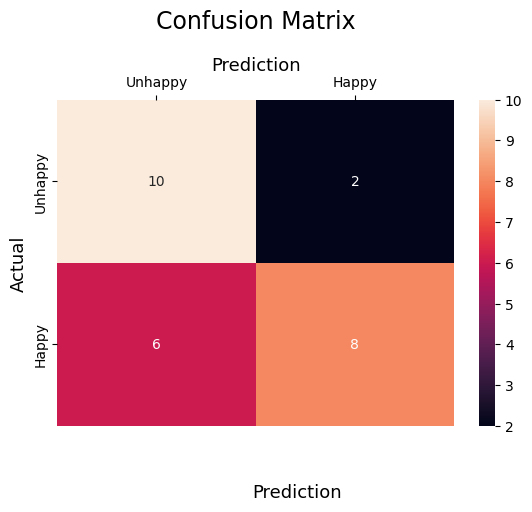

In [48]:
# Evaluating LightGBM Performance and Visualizing Confusion Matrix using the best hyperparameters from hyperopt
# Generating predictions on the test set using the LightGBM classifier and evaluating performance with a classification report. 
# Additionally, visualizing the confusion matrix as a heatmap for better interpretation of model results.
# Features used are the top 3 features from RFE which is based from LightGBM model.

lgbm_opt_red_y_pred = lgbm_opt_red.predict(Xr_test)
lgbm_opt_red_cm = confusion_matrix(y_test, lgbm_opt_red_y_pred)


target_names = ['class 0', 'class 1']
print(classification_report(y_test, lgbm_opt_red_y_pred, target_names=target_names))


sns.heatmap(lgbm_opt_red_cm,
            annot=True,
            fmt='g',
            xticklabels=['Unhappy','Happy'],
            yticklabels=['Unhappy','Happy'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

NOTE:
- After reducing the features, LightGBM base model now gives 83% recall with 69% accuracy for class0
- Using the original features, LightGBM base model gives 82% recall with accurace of 65% for class0
- There was an improved performance using LightGBM base model comparing original dataset to the reduced dataset with hyperparameter optimzation

-----

CONCLUSION SUMMARY

----

Objective:
The goal of this analysis is to identify the key factors influencing customer happiness based on survey data. We approached this as a classification problem, predicting whether a customer is "happy" or "not happy" based on key features.

Approach Summary:
We applied several machine learning models to analyze the dataset and determine which features impact customer satisfaction. The LightGBM classifier, a gradient boosting model, provided the most accurate results, demonstrating strong performance in handling this classification task. We trained the model with 80% of the data and tested it with 20%.

We also performed feature selection to identify the top 3 features contributing to customer happiness and tuned model parameters to further improve performance.

Key Findings:
The top 3 features influencing customer satisfaction were:
✅ delivered_on_time
✅ User_ordered_what_they_want
✅ good_price_for_order

Base Model (with 6 original features):
- Accuracy: 65%
- Precision: 80% for happy customers, but only 56% for unhappy customers
- Recall: 82% for unhappy customers, but only 53% for happy customers

Optimized Model (using top 3 features):
- Accuracy: Improved to 69%
- Precision for unhappy customers: Increased to 62%
- Recall for unhappy customers: Increased to 83%
- Precision and recall for happy customers: Remained strong at 80% and 57%, respectively

Business Insights:
The same features that drive customer happiness are the ones that lead to dissatisfaction when they underperform. Specifically:
- Delays in delivery are strongly associated with unhappy feedback.
- Receiving the wrong item or incomplete orders leads to customer dissatisfaction.
- Customers feel the price was not justified for the product or service.

Recommendations:
- Improve delivery logistics: Focus on optimizing courier scheduling to ensure timely deliveries and set realistic delivery expectations.
- Enhance order accuracy: Strengthen order confirmation and validation processes to ensure customers receive what they ordered.
- Review pricing strategies: Ensure that prices align with customer expectations, and consider offering loyalty discounts or more transparent pricing models.

Note:
Focusing on these areas will likely lead to improved customer satisfaction, reduced complaints, and better long-term customer loyalty.